In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

2025-11-12 22:44:56.676167: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-12 22:44:56.686425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763016296.698412   39868 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763016296.702271   39868 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763016296.711132   39868 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Load the data

In [2]:
Dtrain, Dvalid = mnist.load_data()

# Unpack and one-hot encode the output

In [3]:
X_train, y_train = Dtrain
X_valid, y_valid = Dvalid

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

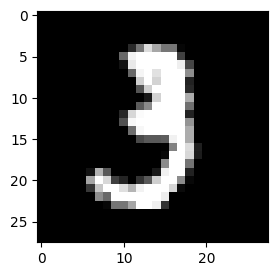

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[10], cmap='gray')

# Train a CNN

In [5]:
model = Sequential([
  Conv2D(filters=3, kernel_size=4, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=4),
  Flatten(),
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

epochs = 10
traindata = model.fit(X_train,y_train,
                      epochs=epochs,
                      validation_data=(X_valid, y_valid))

Epoch 1/10


/home/gomes/venvs/sdse/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-12 22:44:58.302494: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5647 - loss: 23.7148 - val_accuracy: 0.8427 - val_loss: 1.1757
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8563 - loss: 0.8699 - val_accuracy: 0.9011 - val_loss: 0.3427
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9069 - loss: 0.3212 - val_accuracy: 0.9334 - val_loss: 0.2206
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9255 - loss: 0.2448 - val_accuracy: 0.9367 - val_loss: 0.2077
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9367 - loss: 0.2089 - val_accuracy: 0.9503 - val_loss: 0.1648
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9456 - loss: 0.1814 - val_accuracy: 0.9513 - val_loss: 0.1549
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9483 - loss: 0.1732 - val_accuracy: 0.9534 - val_loss: 0.1487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9506 - loss: 0.1653 - val_accura

# Plot the training history

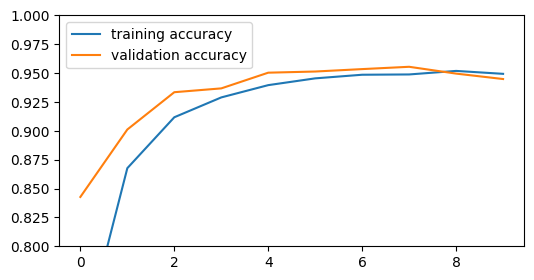

In [6]:
plt.figure(figsize=(6,3))
plt.plot(range(epochs),traindata.history['accuracy'],label='training accuracy')
plt.plot(range(epochs),traindata.history['val_accuracy'],label='validation accuracy')
plt.ylim(0.8,1)
plt.legend()